In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
from pandas import read_csv,set_option
from pandas.plotting import scatter_matrix

In [2]:
# loading data
fraud_data = pd.read_csv('creditcard.csv')

In [3]:
fraud_data.shape

(284807, 31)

In [4]:
fraud_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
class_names = {0:'Not Fraud', 1:'Fraud'}
Class_count = fraud_data.Class.value_counts().rename(index = class_names)
print(Class_count)

Not Fraud    284315
Fraud           492
Name: Class, dtype: int64


In [6]:
# spliting data into train_set and test_set
from sklearn.model_selection import train_test_split
y = fraud_data['Class']
X = fraud_data.loc[:,fraud_data.columns != 'Class']
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
# y_train.value_counts()
# 0    227451
# 1       394

In [7]:
print(y_train.value_counts())

0    227451
1       394
Name: Class, dtype: int64


In [8]:
print(y_test.value_counts())

0    56864
1       98
Name: Class, dtype: int64


In [9]:
# scaler
from sklearn import preprocessing
scaler_X_train = preprocessing.StandardScaler().fit(X_train)
scaler_X_test = preprocessing.StandardScaler().fit(X_test)
X_train_scaled = scaler_X_train.transform(X_train)
X_test_scaled = scaler_X_test.transform(X_test)

In [10]:
print(X_train_scaled)

[[ 1.02255459  0.99785119 -0.22962626 ...  0.11248883 -0.14374055
  -0.30788875]
 [ 0.47128275 -0.205221   -0.37821992 ... -0.92189789 -0.43984143
  -0.1670264 ]
 [ 1.15338663  0.03655821  0.49556347 ...  0.51372993  0.21235767
  -0.30004345]
 ...
 [-0.31581527 -0.07533181  0.59962034 ... -0.3013968  -0.59571596
  -0.33162078]
 [-0.1444891  -1.50615534  1.42172842 ...  1.23673372  1.01755287
  -0.34315338]
 [-0.38770656  0.62923844 -0.47354037 ...  0.00310728  0.11623211
   0.0961834 ]]


In [11]:
# --------------------logistic regression model--------------------
from sklearn.linear_model import LogisticRegression
cred_logistic = LogisticRegression()
cred_logistic.fit(X_train_scaled,y_train)
y_pred_logistic = cred_logistic.predict(X_test_scaled)
# y_pred = pd.DataFrame(y_pred)
# y_pred.value_counts()
# 0    56872
# 1       90

### The first evaluation method: accuracy_score

In [12]:
# accuracy_score
from sklearn.metrics import accuracy_score
cred_logistic_acc = accuracy_score(y_test,y_pred_logistic)*100
print("Accuracy of Logistic Regression model: %0.2f " % cred_logistic_acc)

Accuracy of Logistic Regression model: 99.91 


### The second evaluation method: confusion_matrix 

confusion matrix of logistic:
[[56855     9]
 [   41    57]]


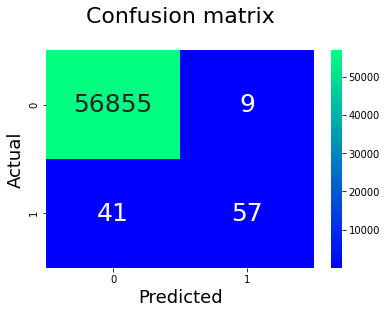

In [13]:
#  confusion_matrix 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cred_logistic_confusion = confusion_matrix(y_test,y_pred_logistic)
print("confusion matrix of logistic:")
print(cred_logistic_confusion)
# sns.heatmap(cred_logistic_confusion,annot=True)
sns.heatmap(pd.DataFrame(cred_logistic_confusion), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')
plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.xlabel('Predicted',fontsize = 18)
plt.ylabel('Actual',fontsize = 18)

plt.show()

In [14]:
# --------------------random forest model--------------------
from sklearn.ensemble import RandomForestClassifier
cred_randomforest = RandomForestClassifier()
cred_randomforest.fit(X_train_scaled,y_train)
y_pred_randomforest = cred_randomforest.predict(X_test_scaled)

In [15]:
cred_randomforest_acc = accuracy_score(y_test,y_pred_randomforest)*100
print("Accuracy of random forest model: %0.2f  "% cred_randomforest_acc)

Accuracy of random forest model: 99.96  


confusion matrix of random forest:
[[56861     3]
 [   22    76]]


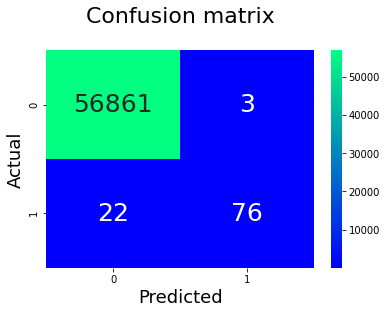

In [16]:
cred_randomforest_confusion = confusion_matrix(y_test,y_pred_randomforest)
print("confusion matrix of random forest:")
print(cred_randomforest_confusion)
sns.heatmap(pd.DataFrame(cred_randomforest_confusion), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')
plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.xlabel('Predicted',fontsize = 18)
plt.ylabel('Actual',fontsize = 18)

plt.show()

<ipython-input-17-c7d1972b80c7>:22: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(


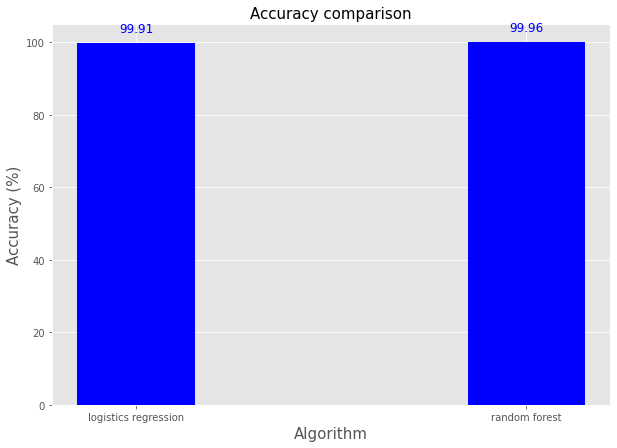

In [17]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
x = ["logistics regression", "random forest"]
y = [99.91, 99.96]

fig, ax = plt.subplots(figsize=(10, 7))
ax.bar(
    x=x, 
    height=y, 
    width=0.3, 
    align="center", 
    color="blue",  
)
ax.set_title("Accuracy comparison", fontsize=15)
ax.set_xlabel("Algorithm", fontsize=15)
ax.set_ylabel("Accuracy (%)",fontsize=15)

xticks = ax.get_xticks()
for i in range(len(y)):
    xy = (xticks[i], y[i] * 1.03)
    s = str(y[i])
    ax.annotate(
        s=s,  
        xy=xy,  
        fontsize=12, 
        color="blue",  
        ha="center",  
        va="baseline"  
    )

#### Because the data is imbalanced, and we should pay more attention to the minority category. The minority classes cannot be accurately expressed by the two methods of confusion_matrix or accuracy_score. Although these two methods are not accurate, we still use these two evaluation criteria for comparison below. Of course, we also used other evaluation methods to evaluate the accuracy of the algorithm.

### The third evaluation method: average_score

In [18]:
from sklearn.metrics import average_precision_score
cred_logistic_acc_ave = average_precision_score(y_test,y_pred_logistic)*100
print("Average precision score of logistic: %0.2f " % cred_logistic_acc_ave)

Average precision score of logistic: 50.30 


In [19]:
cred_randomforest_acc_ave = average_precision_score(y_test,y_pred_randomforest)*100
print("Average precision score of logistic: %0.2f " % cred_randomforest_acc_ave)

Average precision score of logistic: 74.64 


<ipython-input-20-256aeb55f48a>:21: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(


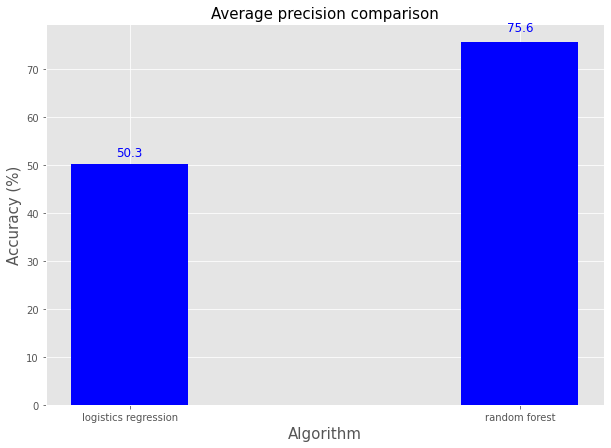

In [20]:
plt.style.use("ggplot")
x = ["logistics regression", "random forest"]
y = [50.30, 75.60]

fig, ax = plt.subplots(figsize=(10, 7))
ax.bar(
    x=x, 
    height=y, 
    width=0.3, 
    align="center", 
    color="blue",  
)
ax.set_title("Average precision comparison", fontsize=15)
ax.set_xlabel("Algorithm", fontsize=15)
ax.set_ylabel("Accuracy (%)",fontsize=15)

xticks = ax.get_xticks()
for i in range(len(y)):
    xy = (xticks[i], y[i] * 1.03)
    s = str(y[i])
    ax.annotate(
        s=s,  
        xy=xy,  
        fontsize=12, 
        color="blue",  
        ha="center",  
        va="baseline"  
    )

### The forth evaluation method: ROC - AUC
#### the first -> logistic  ;   second -> random forest

In [21]:
from sklearn import metrics
metrics.roc_auc_score(y_test,y_pred_logistic)


0.7907371903460314

AUC -  0.7907371903460314 



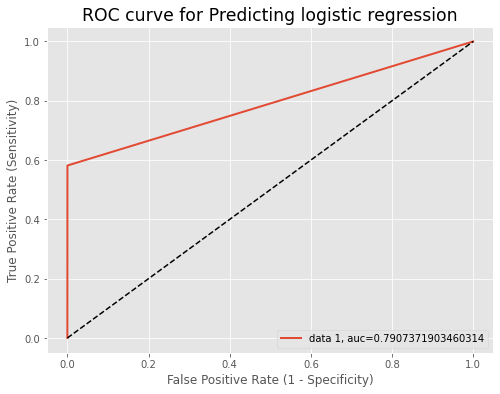

In [22]:
plt.figure(figsize=(8,6))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_logistic)
auc_logistic = metrics.roc_auc_score(y_test, y_pred_logistic)
print("AUC - ",auc_logistic,"\n")
plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc_logistic))
plt.legend(loc=4)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting logistic regression')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [23]:
metrics.roc_auc_score(y_test,y_pred_randomforest)

0.8877287233126226

AUC -  0.8877287233126226 



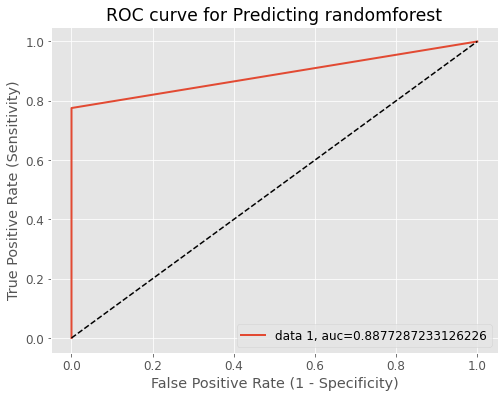

In [24]:
plt.figure(figsize=(8,6))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_randomforest)
auc_randomforest = metrics.roc_auc_score(y_test, y_pred_randomforest)
print("AUC - ",auc_randomforest,"\n")
plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc_randomforest))
plt.legend(loc=4)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting randomforest')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

<ipython-input-25-3b0333be0578>:21: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(


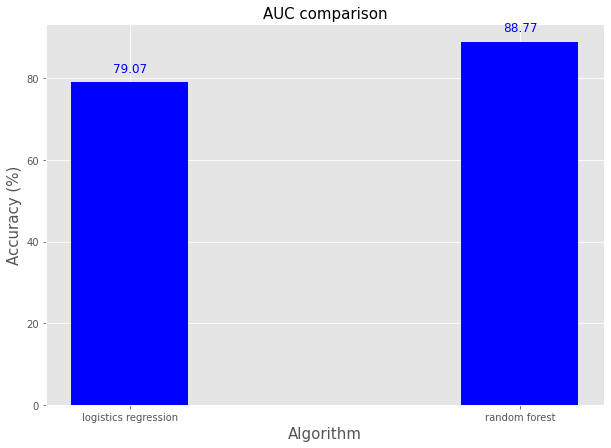

In [25]:
plt.style.use("ggplot")
x = ["logistics regression", "random forest"]
y = [79.07, 88.77]

fig, ax = plt.subplots(figsize=(10, 7))
ax.bar(
    x=x, 
    height=y, 
    width=0.3, 
    align="center", 
    color="blue",  
)
ax.set_title("AUC comparison", fontsize=15)
ax.set_xlabel("Algorithm", fontsize=15)
ax.set_ylabel("Accuracy (%)",fontsize=15)

xticks = ax.get_xticks()
for i in range(len(y)):
    xy = (xticks[i], y[i] * 1.03)
    s = str(y[i])
    ax.annotate(
        s=s,  
        xy=xy,  
        fontsize=12, 
        color="blue",  
        ha="center",  
        va="baseline"  
    )

### The fifth evaluation method: precision-recall
#### By consulting resources, we learned that when evaluating a binary classifier on an imbalanced data set, the precision-recall graph will provide more information than the ROC graph.
#### https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

f1_logistic=0.695


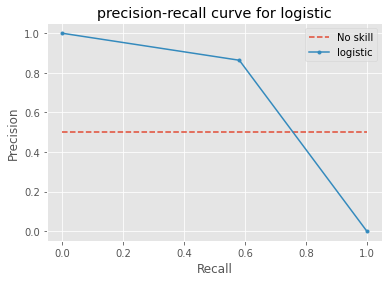

In [26]:
# calculate precision-recall curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_logistic)
f1 = metrics.f1_score(y_test, y_pred_logistic)
print('f1_logistic=%.3f' % (f1))
plt.title("precision-recall curve for logistic")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.plot([0, 1], [0.5, 0.5], linestyle='--',label = 'No skill')
plt.plot(recall, precision, marker='.', label = 'logistic')
plt.legend()
plt.show()


f1_randomforest=0.859


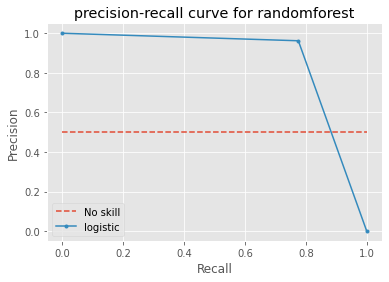

In [27]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_randomforest)
f1 = metrics.f1_score(y_test, y_pred_randomforest)
print('f1_randomforest=%.3f' % (f1))
plt.title("precision-recall curve for randomforest")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.plot([0, 1], [0.5, 0.5], linestyle='--',label = 'No skill')
plt.plot(recall, precision, marker='.', label = 'logistic')
plt.legend()
plt.show()

<ipython-input-28-2b24e6833809>:21: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(


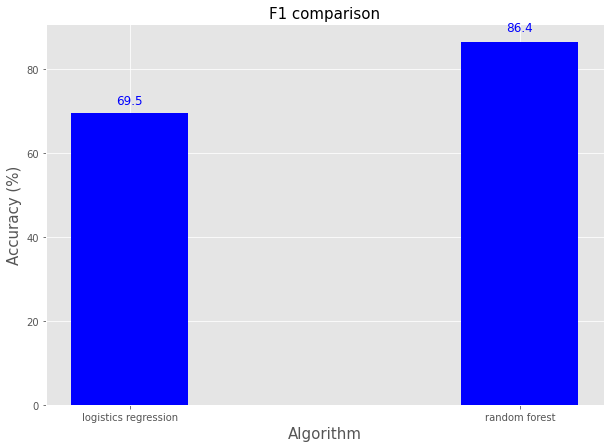

In [28]:
plt.style.use("ggplot")
x = ["logistics regression", "random forest"]
y = [69.5, 86.4]

fig, ax = plt.subplots(figsize=(10, 7))
ax.bar(
    x=x, 
    height=y, 
    width=0.3, 
    align="center", 
    color="blue",  
)
ax.set_title("F1 comparison", fontsize=15)
ax.set_xlabel("Algorithm", fontsize=15)
ax.set_ylabel("Accuracy (%)",fontsize=15)

xticks = ax.get_xticks()
for i in range(len(y)):
    xy = (xticks[i], y[i] * 1.03)
    s = str(y[i])
    ax.annotate(
        s=s,  
        xy=xy,  
        fontsize=12, 
        color="blue",  
        ha="center",  
        va="baseline"  
    )

### We have done five different accuracy analyses for logistics regression and random forest
### Because of the existence of imbalance data, the result is very different. We use different methods to reduce the impact of imbalance data on accuracy. The accuracy is improved.
### Considering the above results, the accuracy of logistics regression has the largest difference. Therefore, we mainly apply the processed results to the logistic regression model. In this way, we can compare whether the accuracy has improved.

### method 1: random undersampling

In [29]:
from collections import Counter
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.under_sampling import RandomUnderSampler

In [30]:
print('Original dataset shape %s' % Counter(y_train))
# Undersampling only on train
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train_rus))

Original dataset shape Counter({0: 227451, 1: 394})
Resampled dataset shape Counter({0: 394, 1: 394})


In [31]:
# Undersampling with Logistic Regression
cred_logistic_ruc = LogisticRegression()
cred_logistic_ruc.fit(X_train_rus, y_train_rus)
y_pred_logistic_ruc = cred_logistic_ruc.predict(X_test)

#### 1.1accuracy score

In [32]:
cred_logistic_ruc_acc = accuracy_score(y_test,y_pred_logistic_ruc)*100
print("Accuracy of Logistic Regression model with random undersampling: %0.2f " % cred_logistic_ruc_acc)

Accuracy of Logistic Regression model with random undersampling: 95.02 


<ipython-input-33-b53810d7a0d1>:21: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(


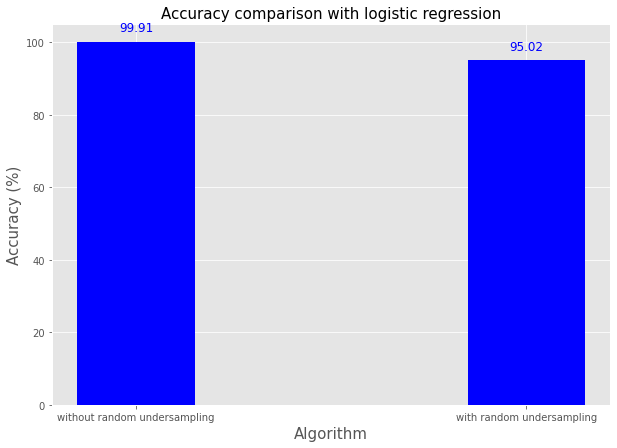

In [33]:
plt.style.use("ggplot")
x = ["without random undersampling", "with random undersampling"]
y = [99.91, 95.02]

fig, ax = plt.subplots(figsize=(10, 7))
ax.bar(
    x=x, 
    height=y, 
    width=0.3, 
    align="center", 
    color="blue",  
)
ax.set_title("Accuracy comparison with logistic regression", fontsize=15)
ax.set_xlabel("Algorithm", fontsize=15)
ax.set_ylabel("Accuracy (%)",fontsize=15)

xticks = ax.get_xticks()
for i in range(len(y)):
    xy = (xticks[i], y[i] * 1.03)
    s = str(y[i])
    ax.annotate(
        s=s,  
        xy=xy,  
        fontsize=12, 
        color="blue",  
        ha="center",  
        va="baseline"  
    )

#### 1.2 Confusion matrix

confusion matrix of logistic with random undersampling:
[[54033  2831]
 [    8    90]]


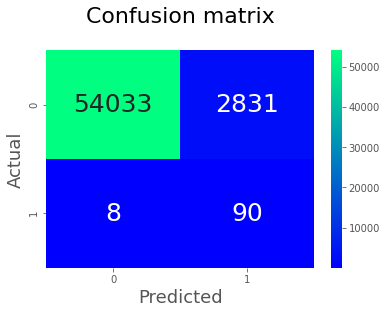

In [34]:
cred_logistic_confusion_rus = metrics.confusion_matrix(y_test , y_pred_logistic_ruc)
print("confusion matrix of logistic with random undersampling:")
print(cred_logistic_confusion_rus)
sns.heatmap(pd.DataFrame(cred_logistic_confusion_rus), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.xlabel('Predicted',fontsize = 18)
plt.ylabel('Actual',fontsize = 18)

plt.show()

#### 1.3 average precision score

In [35]:
Counter(y_test)

Counter({1: 98, 0: 56864})

In [36]:
Counter(y_pred_logistic_ruc)


Counter({1: 2921, 0: 54041})

In [37]:
cred_logistic_ave_ruc = average_precision_score(y_test,y_pred_logistic_ruc)*100
print("Average precision score of logistic with random undersampling: %0.2f " % cred_logistic_ave_ruc)

Average precision score of logistic with random undersampling: 2.84 


<ipython-input-38-6317eff98a84>:21: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(


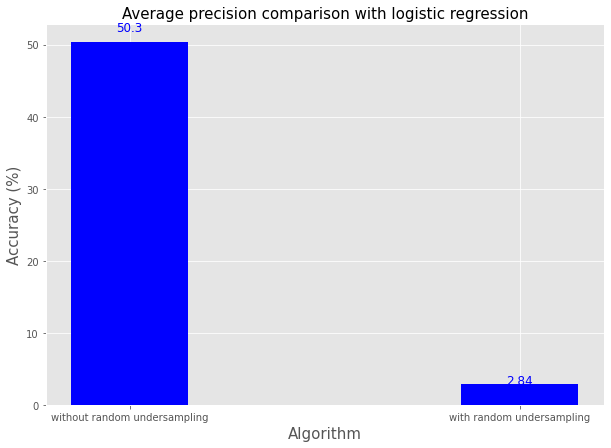

In [38]:
plt.style.use("ggplot")
x = ["without random undersampling", "with random undersampling"]
y = [50.30, 2.84]

fig, ax = plt.subplots(figsize=(10, 7))
ax.bar(
    x=x, 
    height=y, 
    width=0.3, 
    align="center", 
    color="blue",  
)
ax.set_title("Average precision comparison with logistic regression", fontsize=15)
ax.set_xlabel("Algorithm", fontsize=15)
ax.set_ylabel("Accuracy (%)",fontsize=15)

xticks = ax.get_xticks()
for i in range(len(y)):
    xy = (xticks[i], y[i] * 1.03)
    s = str(y[i])
    ax.annotate(
        s=s,  
        xy=xy,  
        fontsize=12, 
        color="blue",  
        ha="center",  
        va="baseline"  
    )

#### 1.4 ROC Curve

AUC -  0.9342909469640417 



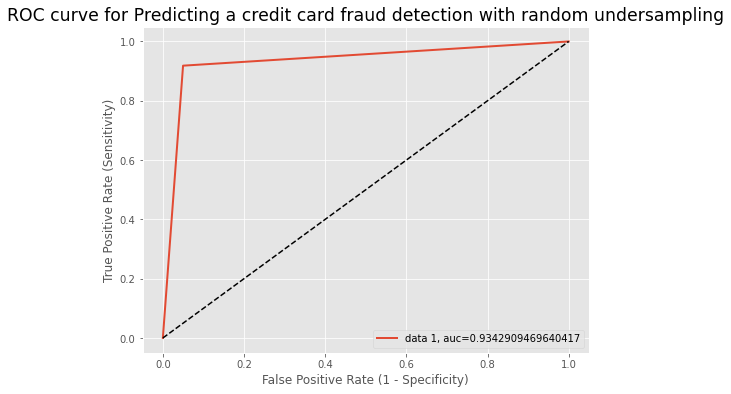

In [39]:
plt.figure(figsize=(8,6))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_logistic_ruc)

logistic_auc_ruc = metrics.roc_auc_score(y_test, y_pred_logistic_ruc)
print("AUC - ",logistic_auc_ruc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(logistic_auc_ruc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection with random undersampling')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

<ipython-input-40-0a1c40008eeb>:21: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(


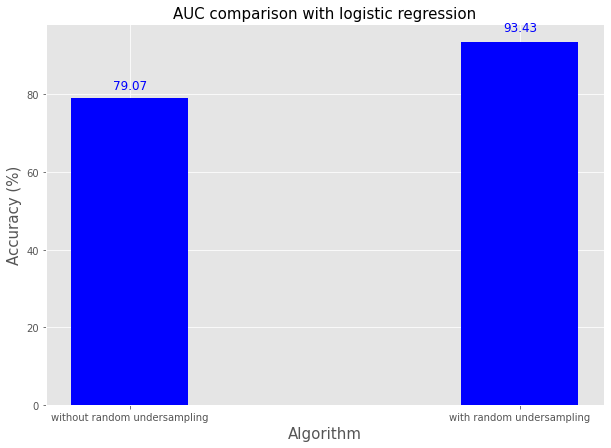

In [40]:
plt.style.use("ggplot")
x = ["without random undersampling", "with random undersampling"]
y = [79.07, 93.43]

fig, ax = plt.subplots(figsize=(10, 7))
ax.bar(
    x=x, 
    height=y, 
    width=0.3, 
    align="center", 
    color="blue",  
)
ax.set_title("AUC comparison with logistic regression", fontsize=15)
ax.set_xlabel("Algorithm", fontsize=15)
ax.set_ylabel("Accuracy (%)",fontsize=15)

xticks = ax.get_xticks()
for i in range(len(y)):
    xy = (xticks[i], y[i] * 1.03)
    s = str(y[i])
    ax.annotate(
        s=s,  
        xy=xy,  
        fontsize=12, 
        color="blue",  
        ha="center",  
        va="baseline"  
    )

#### 1.5 precision-recall curve

f1_logistic=0.060


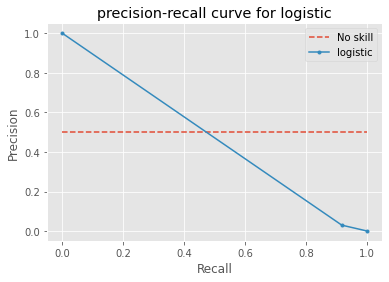

In [41]:
# calculate precision-recall curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_logistic_ruc)
f1_ruc = metrics.f1_score(y_test, y_pred_logistic_ruc)
print('f1_logistic=%.3f' % (f1_ruc))
plt.title("precision-recall curve for logistic")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.plot([0, 1], [0.5, 0.5], linestyle='--',label = 'No skill')
plt.plot(recall, precision, marker='.', label = 'logistic')
plt.legend()
plt.show()

<ipython-input-42-ac1b4229ea98>:21: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(


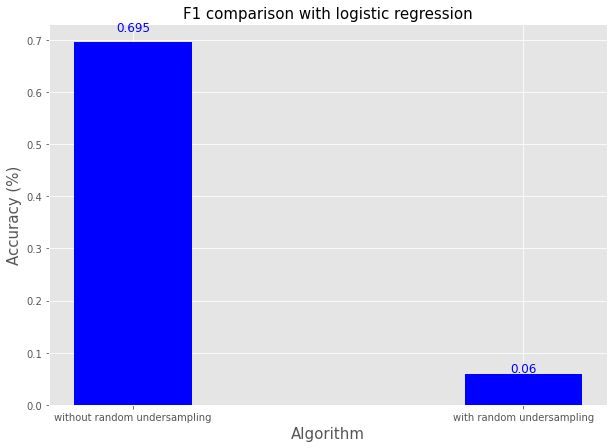

In [42]:
plt.style.use("ggplot")
x = ["without random undersampling", "with random undersampling"]
y = [0.695, 0.060]

fig, ax = plt.subplots(figsize=(10, 7))
ax.bar(
    x=x, 
    height=y, 
    width=0.3, 
    align="center", 
    color="blue",  
)
ax.set_title("F1 comparison with logistic regression", fontsize=15)
ax.set_xlabel("Algorithm", fontsize=15)
ax.set_ylabel("Accuracy (%)",fontsize=15)

xticks = ax.get_xticks()
for i in range(len(y)):
    xy = (xticks[i], y[i] * 1.03)
    s = str(y[i])
    ax.annotate(
        s=s,  
        xy=xy,  
        fontsize=12, 
        color="blue",  
        ha="center",  
        va="baseline"  
    )

### method 2: logistic regression with random oversampling technique

In [43]:
from imblearn.over_sampling import RandomOverSampler

In [44]:
print('Original dataset shape %s' % Counter(y_train))

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_ros))

Original dataset shape Counter({0: 227451, 1: 394})
Resampled dataset shape Counter({0: 227451, 1: 227451})


In [45]:
# Oversampling with Logistic Regression
cred_logistic_ros = LogisticRegression(max_iter=1000)
cred_logistic_ros.fit(X_train_ros, y_train_ros)

y_pred_ros = cred_logistic_ros.predict(X_test)

#### 2.1 accuracy score

In [46]:
cred_logistic_ros_acc = accuracy_score(y_test,y_pred_ros)*100
print("Accuracy of Logistic Regression model with random oversampling: %0.2f " % cred_logistic_ros_acc)

Accuracy of Logistic Regression model with random oversampling: 96.78 


#### 2.2 Confusion Matrix

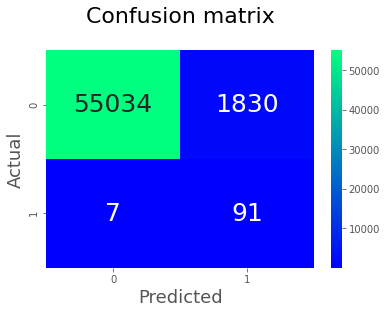

In [47]:
cnf_matrix = metrics.confusion_matrix(y_test , y_pred_ros)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.xlabel('Predicted',fontsize = 18)
plt.ylabel('Actual',fontsize = 18)

plt.show()

#### 2.3 average score

In [48]:
cred_logistic_ave_ros = average_precision_score(y_test,y_pred_ros)*100
print("Average precision score of logistic with random oversampling: %0.2f " % cred_logistic_ave_ros)

Average precision score of logistic with random oversampling: 4.41 


#### 2.4 ROC Curve

AUC -  0.9481946900876276 



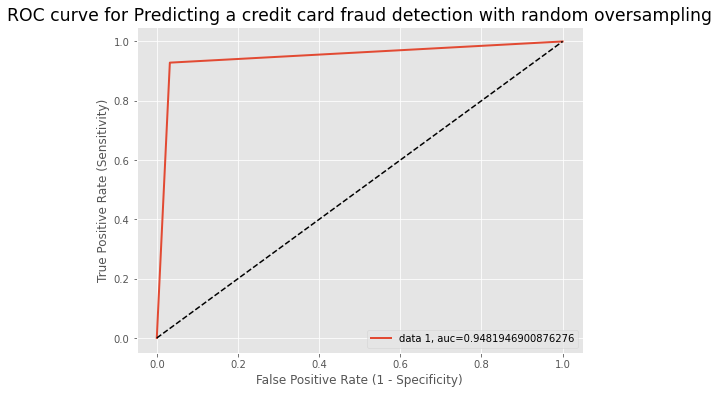

In [97]:
plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_ros)

auc = metrics.roc_auc_score(y_test, y_pred_ros)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection with random oversampling')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

#### 2.5 precision-recall curve

f1=0.090


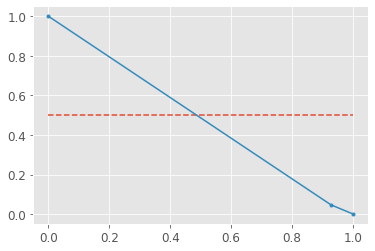

In [50]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_ros)
f1 = metrics.f1_score(y_test, y_pred_ros)
print('f1=%.3f' % (f1))

plt.plot([0, 1], [0.5, 0.5], linestyle='--')

plt.plot(recall, precision, marker='.')
plt.show()

#### 3：SMOTE based on oversample

In [51]:
from imblearn.over_sampling import SMOTE

In [52]:
print('Original dataset shape %s' % Counter(y_train))
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train_smote))

Original dataset shape Counter({0: 227451, 1: 394})
Resampled dataset shape Counter({0: 227451, 1: 227451})


In [53]:

cred_logistic_smote = LogisticRegression(max_iter=1000)
cred_logistic_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = cred_logistic_smote.predict(X_test)

In [54]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred_smote))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_smote)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_smote)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_smote)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_smote)))

Accuracy :0.98337
AUC : 0.93565
Precision : 0.08504
Recall : 0.88776
F1 : 0.15522


#### 3.1 accuracy score

In [55]:
cred_logistic_smote_acc = accuracy_score(y_test,y_pred_smote)*100
print("Accuracy of Logistic Regression model with random undersampling: %0.2f " % cred_logistic_smote_acc)

Accuracy of Logistic Regression model with random undersampling: 98.34 


<ipython-input-56-0274b5a5f900>:22: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(


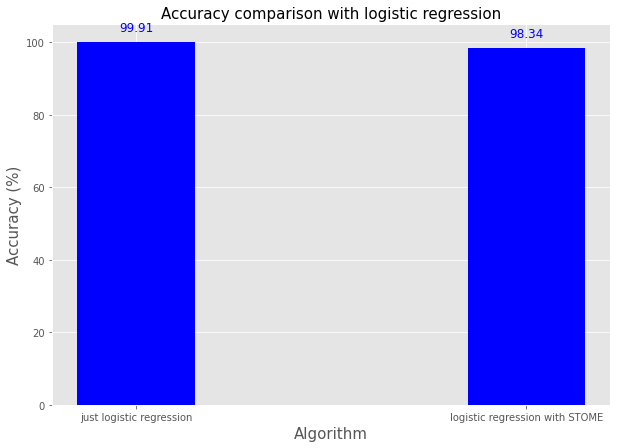

In [56]:
plt.style.use("ggplot")
x = ["just logistic regression", "logistic regression with STOME"]
y = [99.91, 98.34]

fig, ax = plt.subplots(figsize=(10, 7))
ax.bar(
    x=x, 
    height=y, 
    width=0.3, 
    align="center", 
    color="blue",  
)
ax.set_title("Accuracy comparison with logistic regression", fontsize=15)
ax.set_xlabel("Algorithm", fontsize=15)
ax.set_ylabel("Accuracy (%)",fontsize=15)

xticks = ax.get_xticks()
for i in range(len(y)):
    xy = (xticks[i], y[i] * 1.03)
    s = str(y[i])
    ax.annotate(
        s=s,  
        xy=xy,  
        fontsize=12, 
        color="blue",  
        ha="center",  
        va="baseline"  
    )

confusion matrix of logistic with SMOTE:
[[55928   936]
 [   11    87]]


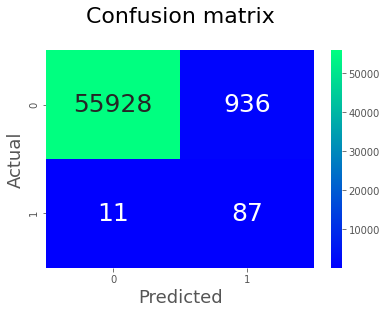

In [57]:
cred_logistic_confusion_smote = metrics.confusion_matrix(y_test , y_pred_smote)
print("confusion matrix of logistic with SMOTE:")
print(cred_logistic_confusion_smote)
sns.heatmap(pd.DataFrame(cred_logistic_confusion_smote), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.xlabel('Predicted',fontsize = 18)
plt.ylabel('Actual',fontsize = 18)

plt.show()

#### 3.3： average score 

In [58]:
cred_logistic_ave_smote = average_precision_score(y_test,y_pred_smote)*100
print("Average precision score of logistic with random undersampling: %0.2f " % cred_logistic_ave_smote)

Average precision score of logistic with random undersampling: 7.57 


<ipython-input-59-e904b1a766ee>:22: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(


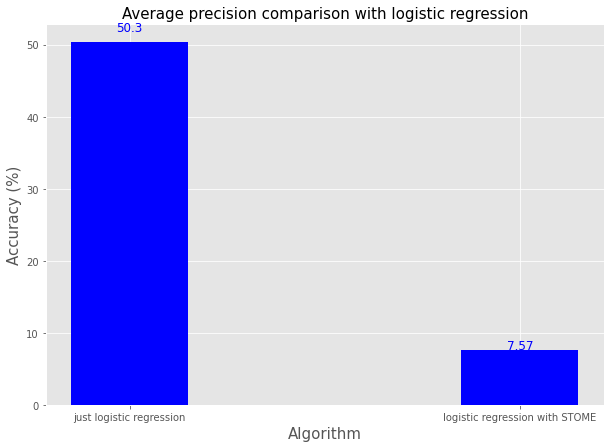

In [59]:
# 准确度对比
plt.style.use("ggplot")
x = ["just logistic regression", "logistic regression with STOME"]
y = [50.30, 7.57]

fig, ax = plt.subplots(figsize=(10, 7))
ax.bar(
    x=x, 
    height=y, 
    width=0.3, 
    align="center", 
    color="blue",  
)
ax.set_title("Average precision comparison with logistic regression", fontsize=15)
ax.set_xlabel("Algorithm", fontsize=15)
ax.set_ylabel("Accuracy (%)",fontsize=15)

xticks = ax.get_xticks()
for i in range(len(y)):
    xy = (xticks[i], y[i] * 1.03)
    s = str(y[i])
    ax.annotate(
        s=s,  
        xy=xy,  
        fontsize=12, 
        color="blue",  
        ha="center",  
        va="baseline"  
    )

#### 3.4: ROC AUC

AUC -  0.9356473878240098 



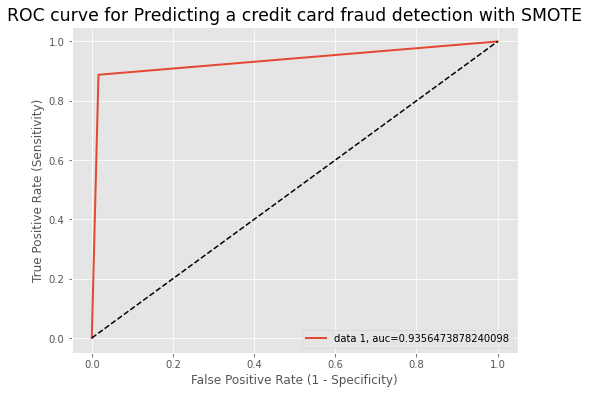

In [60]:
# plot ROC Curve
plt.figure(figsize=(8,6))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_smote)

logistic_auc_smote = metrics.roc_auc_score(y_test, y_pred_smote)
print("AUC - ",logistic_auc_smote,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(logistic_auc_smote))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection with SMOTE')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

<ipython-input-61-a98b22708876>:21: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(


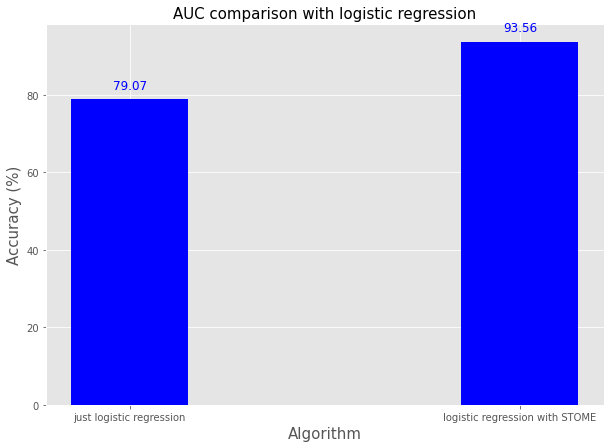

In [61]:
plt.style.use("ggplot")
x = ["just logistic regression", "logistic regression with STOME"]
y = [79.07, 93.56]

fig, ax = plt.subplots(figsize=(10, 7))
ax.bar(
    x=x, 
    height=y, 
    width=0.3, 
    align="center", 
    color="blue",  
)
ax.set_title("AUC comparison with logistic regression", fontsize=15)
ax.set_xlabel("Algorithm", fontsize=15)
ax.set_ylabel("Accuracy (%)",fontsize=15)

xticks = ax.get_xticks()
for i in range(len(y)):
    xy = (xticks[i], y[i] * 1.03)
    s = str(y[i])
    ax.annotate(
        s=s,  
        xy=xy,  
        fontsize=12, 
        color="blue",  
        ha="center",  
        va="baseline"  
    )

f1_logistic=0.155


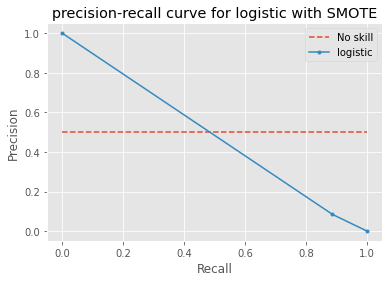

In [62]:
# calculate precision-recall curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_smote)
f1_ruc_smote = metrics.f1_score(y_test, y_pred_smote)
print('f1_logistic=%.3f' % (f1_ruc_smote))
plt.title("precision-recall curve for logistic with SMOTE")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.plot([0, 1], [0.5, 0.5], linestyle='--',label = 'No skill')
plt.plot(recall, precision, marker='.', label = 'logistic')
plt.legend()
plt.show()

<ipython-input-63-c3312c6c127b>:22: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(


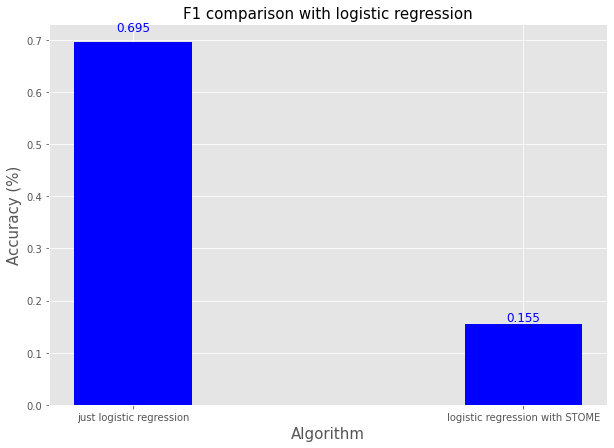

In [63]:
plt.style.use("ggplot")
x = ["just logistic regression", "logistic regression with STOME"]
y = [0.695, 0.155]

fig, ax = plt.subplots(figsize=(10, 7))
ax.bar(
    x=x, 
    height=y, 
    width=0.3, 
    align="center", 
    color="blue",  
)
ax.set_title("F1 comparison with logistic regression", fontsize=15)
ax.set_xlabel("Algorithm", fontsize=15)
ax.set_ylabel("Accuracy (%)",fontsize=15)

xticks = ax.get_xticks()
for i in range(len(y)):
    xy = (xticks[i], y[i] * 1.03)
    s = str(y[i])
    ax.annotate(
        s=s,  
        xy=xy,  
        fontsize=12, 
        color="blue",  
        ha="center",  
        va="baseline"  
    )

### 4：ADASYN

In [64]:
from imblearn.over_sampling import ADASYN
print('Original dataset shape %s' % Counter(y_train))
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train_adasyn))

Original dataset shape Counter({0: 227451, 1: 394})
Resampled dataset shape Counter({0: 227451, 1: 227373})


In [65]:
cred_logistic_adasyn = LogisticRegression(max_iter=1000)
cred_logistic_adasyn.fit(X_train_adasyn, y_train_adasyn)
y_pred_adasyn = cred_logistic_adasyn.predict(X_test)

In [66]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred_adasyn))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_adasyn)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_adasyn)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_adasyn)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_adasyn)))

Accuracy :0.98562
AUC : 0.95715
Precision : 0.10078
Recall : 0.92857
F1 : 0.18182


In [67]:
cred_logistic_adasyn_acc = accuracy_score(y_test,y_pred_adasyn)*100
print("Accuracy of Logistic Regression model with random undersampling: %0.2f " % cred_logistic_adasyn_acc)

Accuracy of Logistic Regression model with random undersampling: 98.56 


<ipython-input-68-4844b8639e6d>:22: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(


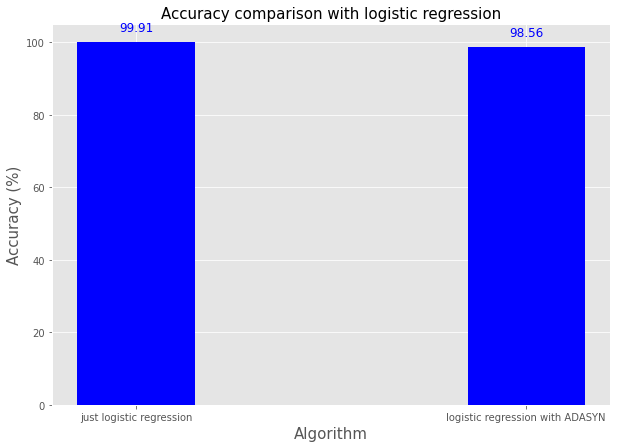

In [68]:

plt.style.use("ggplot")
x = ["just logistic regression", "logistic regression with ADASYN"]
y = [99.91, 98.56 ]

fig, ax = plt.subplots(figsize=(10, 7))
ax.bar(
    x=x, 
    height=y, 
    width=0.3, 
    align="center", 
    color="blue",  
)
ax.set_title("Accuracy comparison with logistic regression", fontsize=15)
ax.set_xlabel("Algorithm", fontsize=15)
ax.set_ylabel("Accuracy (%)",fontsize=15)

xticks = ax.get_xticks()
for i in range(len(y)):
    xy = (xticks[i], y[i] * 1.03)
    s = str(y[i])
    ax.annotate(
        s=s,  
        xy=xy,  
        fontsize=12, 
        color="blue",  
        ha="center",  
        va="baseline"  
    )

confusion matrix of logistic with ADASYN:
[[56052   812]
 [    7    91]]


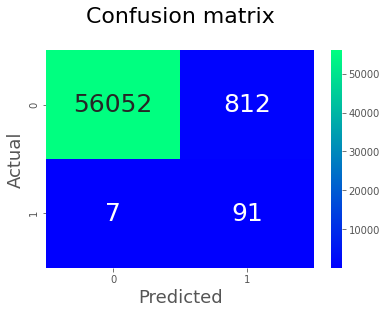

In [69]:
cred_logistic_confusion_adasyn = metrics.confusion_matrix(y_test , y_pred_adasyn)
print("confusion matrix of logistic with ADASYN:")
print(cred_logistic_confusion_adasyn)
sns.heatmap(pd.DataFrame(cred_logistic_confusion_adasyn), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.xlabel('Predicted',fontsize = 18)
plt.ylabel('Actual',fontsize = 18)

plt.show()

#### 3.2 average score

In [70]:
cred_logistic_ave_adasyn = average_precision_score(y_test,y_pred_adasyn)*100
print("Average precision score of logistic with random undersampling: %0.2f " % cred_logistic_ave_adasyn)

Average precision score of logistic with random undersampling: 9.37 


<ipython-input-71-bc1005d44b8d>:22: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(


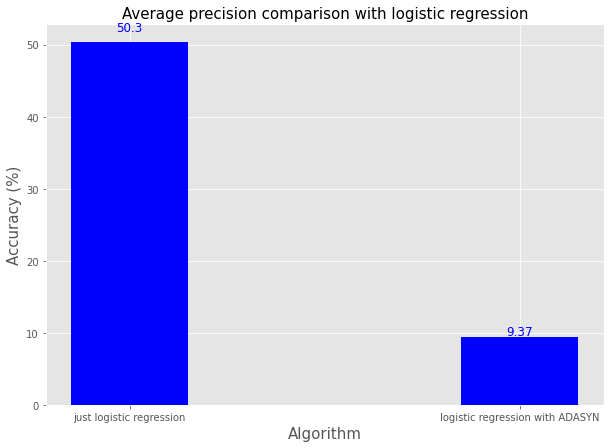

In [71]:

plt.style.use("ggplot")
x = ["just logistic regression", "logistic regression with ADASYN"]
y = [50.30, 9.37]

fig, ax = plt.subplots(figsize=(10, 7))
ax.bar(
    x=x, 
    height=y, 
    width=0.3, 
    align="center", 
    color="blue",  
)
ax.set_title("Average precision comparison with logistic regression", fontsize=15)
ax.set_xlabel("Algorithm", fontsize=15)
ax.set_ylabel("Accuracy (%)",fontsize=15)

xticks = ax.get_xticks()
for i in range(len(y)):
    xy = (xticks[i], y[i] * 1.03)
    s = str(y[i])
    ax.annotate(
        s=s,  
        xy=xy,  
        fontsize=12, 
        color="blue",  
        ha="center",  
        va="baseline"  
    )

AUC -  0.9571458718546508 



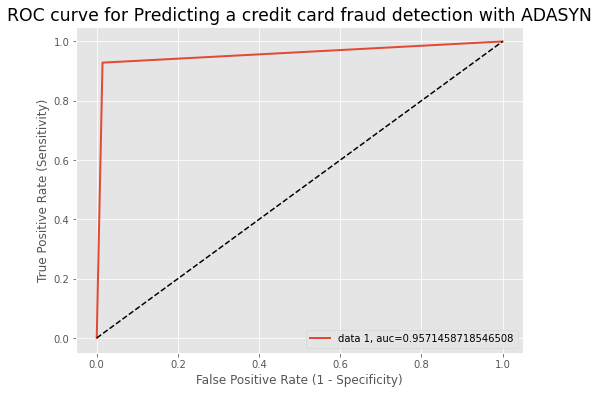

In [72]:
# plot ROC Curve
plt.figure(figsize=(8,6))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_adasyn)

logistic_auc_adasyn = metrics.roc_auc_score(y_test, y_pred_adasyn)
print("AUC - ",logistic_auc_adasyn,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(logistic_auc_adasyn))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection with ADASYN')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

<ipython-input-73-459bd0f53c8c>:22: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(


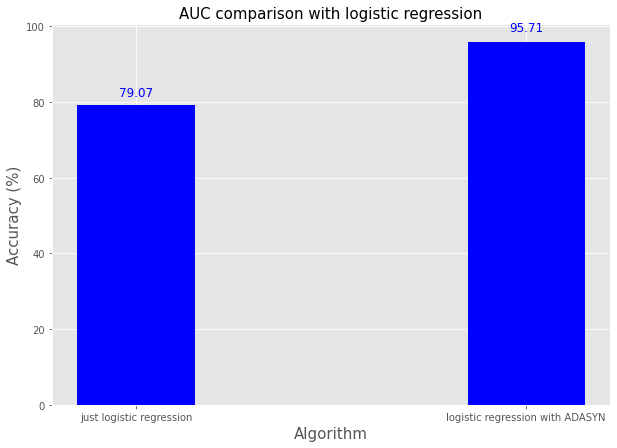

In [73]:

plt.style.use("ggplot")
x = ["just logistic regression", "logistic regression with ADASYN"]
y = [79.07, 95.71]

fig, ax = plt.subplots(figsize=(10, 7))
ax.bar(
    x=x, 
    height=y, 
    width=0.3, 
    align="center", 
    color="blue",  
)
ax.set_title("AUC comparison with logistic regression", fontsize=15)
ax.set_xlabel("Algorithm", fontsize=15)
ax.set_ylabel("Accuracy (%)",fontsize=15)

xticks = ax.get_xticks()
for i in range(len(y)):
    xy = (xticks[i], y[i] * 1.03)
    s = str(y[i])
    ax.annotate(
        s=s,  
        xy=xy,  
        fontsize=12, 
        color="blue",  
        ha="center",  
        va="baseline"  
    )

f1_logistic=0.182


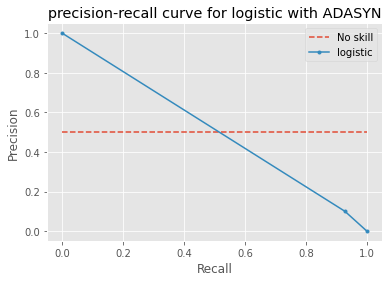

In [74]:
# calculate precision-recall curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_adasyn)
f1_ruc_adasyn = metrics.f1_score(y_test, y_pred_adasyn)
print('f1_logistic=%.3f' % (f1_ruc_adasyn))
plt.title("precision-recall curve for logistic with ADASYN")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.plot([0, 1], [0.5, 0.5], linestyle='--',label = 'No skill')
plt.plot(recall, precision, marker='.', label = 'logistic')
plt.legend()
plt.show()

In [75]:
from pandas import Series,DataFrame
import pandas as pd

### 1. accuracy score 

In [76]:
data_acc = {
         'method':['logistic regression','logistic random undersampling','logistic random oversampling','logistic with STOME','logistic with ADASYN'],
         'score':[99.91,95.02,96.78,98.34,98.56]
       }
df_acc = DataFrame(data_acc)
print(df_acc)

                          method  score
0            logistic regression  99.91
1  logistic random undersampling  95.02
2   logistic random oversampling  96.78
3            logistic with STOME  98.34
4           logistic with ADASYN  98.56


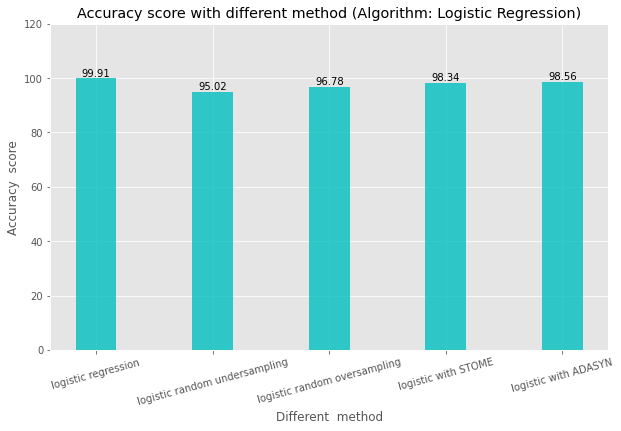

In [77]:
plt.figure(figsize=(10,6))
x=np.arange(5)+1
y=np.array(list(df_acc['score']))

xticks1=list(df_acc['method']) 

plt.bar(x,y,width = 0.35,align='center',color = 'c',alpha=0.8)

plt.xticks(x,xticks1,rotation=15)

plt.xlabel('Different  method')
plt.ylabel('Accuracy  score')
plt.title('Accuracy score with different method (Algorithm: Logistic Regression)')

for a,b in zip(x,y):
    plt.text(a, b+0.05, '%.2f' % b, ha='center', va= 'bottom',fontsize=10)

plt.ylim(0,120)

plt.show()

### 2. average precision score

In [78]:
data_ave = {
         'method':['logistic regression','logistic random undersampling','logistic random oversampling','logistic with STOME','logistic with ADASYN'],
         'score':[50.30 ,2.84, 4.41 ,7.57,9.37]
       }
df_ave = DataFrame(data_ave)
print(df_ave)

                          method  score
0            logistic regression  50.30
1  logistic random undersampling   2.84
2   logistic random oversampling   4.41
3            logistic with STOME   7.57
4           logistic with ADASYN   9.37


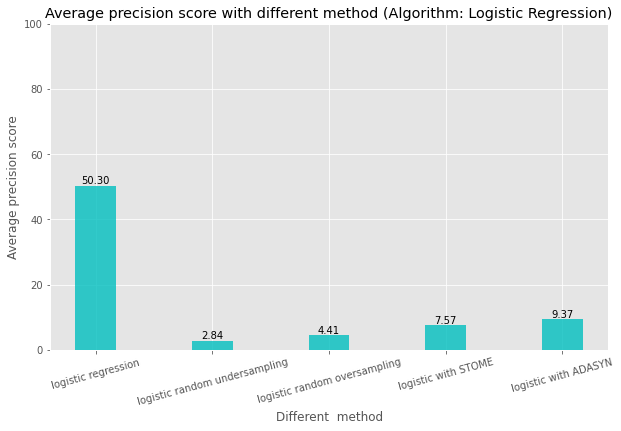

In [79]:
plt.figure(figsize=(10,6))
x=np.arange(5)+1
y=np.array(list(df_ave['score']))

xticks1=list(df_ave['method']) 

plt.bar(x,y,width = 0.35,align='center',color = 'c',alpha=0.8)

plt.xticks(x,xticks1,rotation=15)

plt.xlabel('Different  method')
plt.ylabel('Average precision score')
plt.title('Average precision score with different method (Algorithm: Logistic Regression)')

for a,b in zip(x,y):
    plt.text(a, b+0.05, '%.2f' % b, ha='center', va= 'bottom',fontsize=10)

plt.ylim(0,100)

plt.show()

### 3. ROC-AUC

In [80]:
data_auc = {
         'method':['logistic regression','logistic random undersampling','logistic random oversampling','logistic with STOME','logistic with ADASYN'],
         'score':[0.7907 ,0.9343, 0.9482 ,0.9356 ,0.9571]
       }
df_auc = DataFrame(data_auc)
print(df_auc)

                          method   score
0            logistic regression  0.7907
1  logistic random undersampling  0.9343
2   logistic random oversampling  0.9482
3            logistic with STOME  0.9356
4           logistic with ADASYN  0.9571


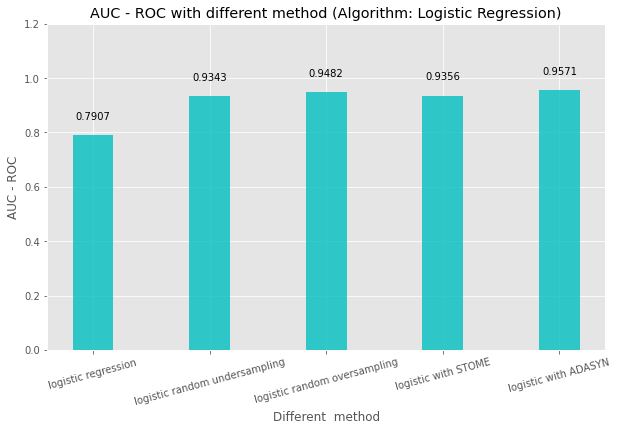

In [81]:
plt.figure(figsize=(10,6))
x=np.arange(5)+1
y=np.array(list(df_auc['score']))

xticks1=list(df_auc['method']) 

plt.bar(x,y,width = 0.35,align='center',color = 'c',alpha=0.8)

plt.xticks(x,xticks1,rotation=15)

plt.xlabel('Different  method')
plt.ylabel('AUC - ROC')
plt.title('AUC - ROC with different method (Algorithm: Logistic Regression)')

for a,b in zip(x,y):
    plt.text(a, b+0.05, '%.4f' % b, ha='center', va= 'bottom',fontsize=10)

plt.ylim(0,1.2)

plt.show()

### 4. F1

In [82]:
data_F1 = {
         'method':['logistic regression','logistic random undersampling','logistic random oversampling','logistic with STOME','logistic with ADASYN'],
         'score':[0.695 ,0.060, 0.090 ,0.155 ,0.182]
       }
df_F1 = DataFrame(data_F1)
print(df_F1)

                          method  score
0            logistic regression  0.695
1  logistic random undersampling  0.060
2   logistic random oversampling  0.090
3            logistic with STOME  0.155
4           logistic with ADASYN  0.182


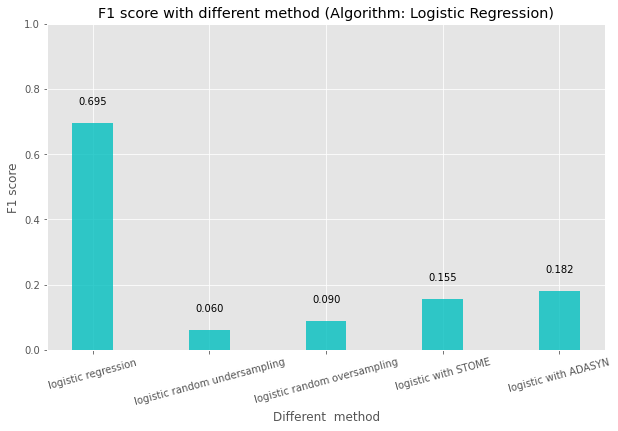

In [83]:
plt.figure(figsize=(10,6))
x=np.arange(5)+1
y=np.array(list(df_F1['score']))

xticks1=list(df_F1['method']) 

plt.bar(x,y,width = 0.35,align='center',color = 'c',alpha=0.8)

plt.xticks(x,xticks1,rotation=15)

plt.xlabel('Different  method')
plt.ylabel('F1 score')
plt.title('F1 score with different method (Algorithm: Logistic Regression)')

for a,b in zip(x,y):
    plt.text(a, b+0.05, '%.3f' % b, ha='center', va= 'bottom',fontsize=10)

plt.ylim(0,1)

plt.show()

In [87]:
print('Recall_logistic : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_logistic)))
print('Recall_undersampling : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_logistic_ruc)))
print('Recall_oversampling : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_ros)))
print('Recall_smote : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_smote)))
print('Recall_adasyn : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_adasyn)))


Recall_logistic : 0.58163
Recall_undersampling : 0.91837
Recall_oversampling : 0.92857
Recall_smote : 0.88776
Recall_adasyn : 0.92857


In [88]:
data_recall = {
         'method':['logistic regression','logistic random undersampling','logistic random oversampling','logistic with STOME','logistic with ADASYN'],
         'score':[58.16 ,91.83, 92.86 ,88.78 ,92.86]
       }
df_recall = DataFrame(data_recall)
print(df_recall)

                          method  score
0            logistic regression  58.16
1  logistic random undersampling  91.83
2   logistic random oversampling  92.86
3            logistic with STOME  88.78
4           logistic with ADASYN  92.86


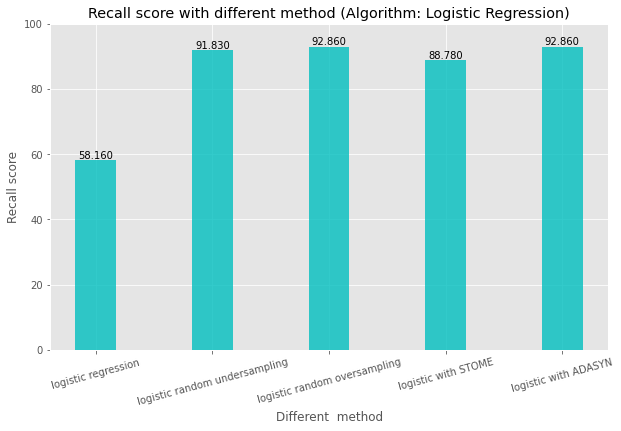

In [91]:
plt.figure(figsize=(10,6))
x=np.arange(5)+1
y=np.array(list(df_recall['score']))

xticks1=list(df_recall['method']) 

plt.bar(x,y,width = 0.35,align='center',color = 'c',alpha=0.8)

plt.xticks(x,xticks1,rotation=15)

plt.xlabel('Different  method')
plt.ylabel('Recall score')
plt.title('Recall score with different method (Algorithm: Logistic Regression)')

for a,b in zip(x,y):
    plt.text(a, b+0.05, '%.3f' % b, ha='center', va= 'bottom',fontsize=10)

plt.ylim(0,100)

plt.show()

In [93]:
data_recall_compare = {
         'method':['logistic regression','Random Forest'],
         'score':[58.16 ,77.55]
       }
df_recall_compare = DataFrame(data_recall_compare)
print(df_recall_compare)

                method  score
0  logistic regression  58.16
1        Random Forest  77.55


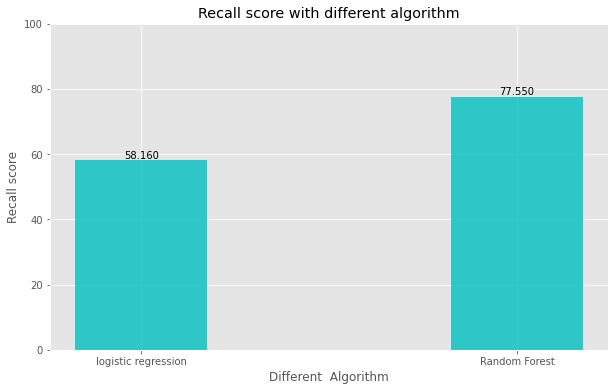

In [96]:
plt.figure(figsize=(10,6))
x=np.arange(2)+1
y=np.array(list(df_recall_compare['score']))

xticks1=list(df_recall_compare['method']) 

plt.bar(x,y,width = 0.35,align='center',color = 'c',alpha=0.8)

plt.xticks(x,xticks1,rotation=0)

plt.xlabel('Different  Algorithm')
plt.ylabel('Recall score')
plt.title('Recall score with different algorithm')

for a,b in zip(x,y):
    plt.text(a, b+0.05, '%.3f' % b, ha='center', va= 'bottom',fontsize=10)

plt.ylim(0,100)

plt.show()